<a href="https://colab.research.google.com/github/bdlemos/data_science/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/titanic

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from google.colab import drive


#Loading data

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/csv/titanic/test.csv')
train = pd.read_csv('/content/drive/MyDrive/csv/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Analysing data

##Missing values

In [ ]:
print(train.isnull().sum())
print('-------------------------')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
train.Age.fillna(train.Age.mean(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test.Age.fillna(test.Age.mean(), inplace = True)
test.Fare.fillna(test.Fare.mean(), inplace = True)

In [ ]:
print(train.isnull().sum())
print('-------------------------')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
-------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


##Removing useless columns


In [ ]:
train.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1, inplace = True)
test.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1, inplace = True)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
train['Sex'].replace({'male': 0, 'female':1}, inplace=True)
train['Embarked'].replace({'C': 0, 'Q':1, 'S':2 }, inplace=True)
test['Sex'].replace({'male': 0, 'female':1}, inplace=True)
test['Embarked'].replace({'C': 0, 'Q':1, 'S':2 }, inplace=True)

#Scaloning

In [ ]:
x_train = train.drop(['Survived'],axis=1)
y_train = train.Survived

AxesSubplot(0.125,0.125;0.62x0.755)


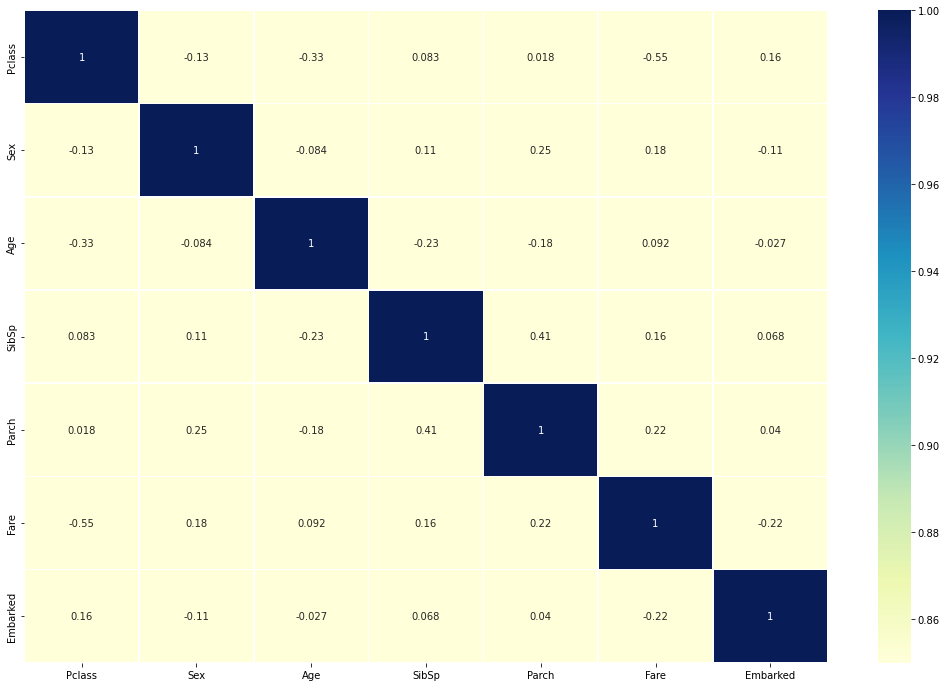

In [ ]:
plt.figure(figsize=(18, 12))
print(sns.heatmap(x_train.corr(), vmin=0.85, vmax=1, annot=True, cmap='YlGnBu', linewidths=.5))

##Scaloning

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train_sc = StandardScaler().fit_transform(x_train)
x_train_sc = pd.DataFrame(x_train_sc)

test_sc = StandardScaler().fit_transform(test)
test_sc = pd.DataFrame(test_sc)

In [ ]:
print(x_train_sc.shape)
print(test_sc.shape)

(891, 7)
(418, 7)


#Spliting data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train_sc, y_train, test_size=0.3, random_state=0)
print("X_train shape ",X_train.shape)
print("y_train shape ",Y_train.shape)
print("X_test shape ",X_test.shape)
print("Y_test shape ",Y_test.shape)

X_train shape  (623, 7)
y_train shape  (623,)
X_test shape  (268, 7)
Y_test shape  (268,)


#Choosing best model

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

c1 = LogisticRegression()
c2 = SVC(kernel = 'rbf', random_state = 1, C = 1, gamma = 0.1)
c3 = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1)
c4 = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=1)
c5 = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=3)
c6 = DecisionTreeClassifier(criterion='entropy', random_state = 10, max_depth=3)


In [ ]:
for c, label in zip([c1,c2,c3,c4, c5, c6],['Logistic Regression','SVM','KNN', 'XGB', 'Random forest', 'Decision tree']):
    c.fit(X_train,Y_train)
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    kfold = KFold(n_splits = 20, shuffle=True, random_state = 10)
    modelo = c
    resultado = cross_val_score(modelo, X_train, Y_train, cv = kfold)

    print(label)
    print("Accuracy: %0.4f  [%s]" % (accuracy_score(Y_train,y_train_pred), 'Train set accuracy '))
    print("Accuracy: %0.4f  [%s]" % (accuracy_score(Y_test,y_test_pred), 'Test set accuracy '))
    print("Cross validation: %.2f%%" % (resultado.mean() * 100.0))
    print('\n')

Logistic Regression
Accuracy: 0.8090  [Train set accuracy ]
Accuracy: 0.7948  [Test set accuracy ]
Cross validation: 79.92%


SVM
Accuracy: 0.8427  [Train set accuracy ]
Accuracy: 0.8097  [Test set accuracy ]
Cross validation: 82.99%


KNN
Accuracy: 0.8491  [Train set accuracy ]
Accuracy: 0.8284  [Test set accuracy ]
Cross validation: 82.50%


XGB
Accuracy: 0.8684  [Train set accuracy ]
Accuracy: 0.8470  [Test set accuracy ]
Cross validation: 82.66%


Random forest
Accuracy: 0.8299  [Train set accuracy ]
Accuracy: 0.8172  [Test set accuracy ]
Cross validation: 81.22%


Decision tree
Accuracy: 0.8363  [Train set accuracy ]
Accuracy: 0.8209  [Test set accuracy ]
Cross validation: 81.55%




#Training

In [ ]:
from xgboost import XGBClassifier
model = SVC(kernel = 'rbf', random_state = 1, C = 2, gamma = 'scale')
model.fit(x_train_sc,y_train)
previsoes = model.predict(test_sc)

In [ ]:
pred= previsoes

#Submission

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/csv/titanic/gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission['Survived'] = pred
submission.to_csv('submission.csv', index = False)
pd.read_csv('submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
